In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("C:/Users/Vartotojas/Desktop/Machine learning/Clusters/3.01. Country clusters.csv")

In [3]:
#MAP the data

data_mapped = data.copy()

data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1,'German':2})
# Check if we did it correctly
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [4]:
# iloc is a method used to 'slice' data 
# 'slice' is not technically correct as there are methods 'slice' which are a bit different
# The term used by pandas is 'selection by position'
# The first argument of identifies the rows we want to keep
# The second - the columns
# When choosing the columns, e.g. a:b, we will keep columns a,a+1,a+2,...,b-1 ; so column b is excluded
x = data_mapped.iloc[:,3:4]
# for this particular case, we are choosing columns 1 and 2
# Note column indices in Python start from 0

In [5]:
#Clustering

In [15]:
# Create an object (which we would call kmeans)
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(2)

In [16]:
# Fit the input data, i.e. cluster the data in X in K clusters
kmeans.fit(x)

KMeans(n_clusters=2)

In [17]:
#Clustering results

In [18]:
# Create a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(x)
# Check the result
identified_clusters

array([1, 1, 0, 1, 0, 1])

In [19]:
# Create a copy of the mapped data
data_with_clusters = data_mapped.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters
# Check the result
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


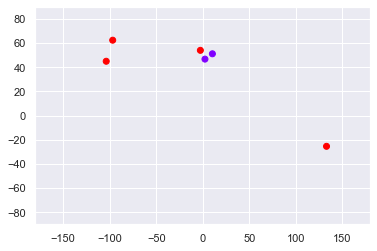

In [20]:
# Plot the data using the longitude and the latitude
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1,2, indicating to plt.scatter, that there are three colors (0,1,2)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
# cmap is the color map. Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

#Result based on language. If we want to show results based on geo location and language we change x = data_mapped.iloc[:,3:4] to x = data_mapped.iloc[:,1:4]

In [21]:
kmeans.inertia_

0.5

In [24]:
wcss=[]

for i in range (1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

C:\Users\Vartotojas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Vartotojas\AppData\Local\Temp\ipykernel_10332\1469687980.py:5: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans.fit(x)
C:\Users\Vartotojas\AppData\Local\Temp\ipykernel_10332\1469687980.py:5: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(x)
C:\Users\Vartotojas\AppData\Local\Temp\ipykernel_10332\1469687980.py:5: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(x)


In [25]:
wcss

[3.5, 0.5, 0.0, 0.0, 0.0, 0.0]

In [26]:
##The Elbow Method

Text(0, 0.5, 'within cluster Sum of squares')

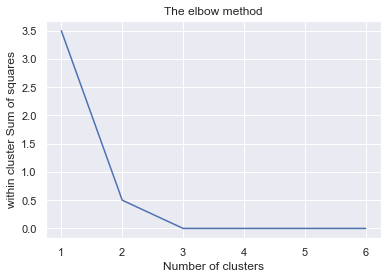

In [30]:
number_clusters = range(1,7)
plt.plot(number_clusters, wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("within cluster Sum of squares")